
# Работа с изображениями

## План лекции

- Знакомство с библиотеками по работе с изображениям
- Примеры алгоритмов компьютерного зрения
- Нейросетевые подходы
- Эмбеддинг изображения
- Польза в анализе данных

## Установка библиотек

Метод установки `opencv` и `pytorch` зависит от операционной системы. Лучше найти метод для установки на свою систему

Установка [pytorch](https://pytorch.org/)

In [1]:
from platform import python_version
import cv2
import torch
import torchvision

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
print(f'Opencv version: {cv2.__version__}. \
        \nPython version: {python_version()}. \
        \nTorch version: {torch.__version__} \
        \nTorchvision version: {torchvision.__version__}')

Opencv version: 4.11.0.         
Python version: 3.12.2.         
Torch version: 2.6.0+cpu         
Torchvision version: 0.21.0+cpu


## Классическое компьютерное зрение

### Лена

В 1973 году Александру Савчуку из Университета Южной Калифорнии для иллюстрации статьи на тему обработки изображений понадобился фотопортрет с хорошим динамическим диапазоном. Савчук отсканировал фрагмент постера из Playboy.

[wiki про Лену](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BD%D0%B0_(%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5)) и [кое-что ещё](http://lenna.org/)

### Чтение картинок

In [ ]:
img = cv2.imread('pics/lena.png')  # Загрузка/чтение изображения

plt.figure(figsize=(15, 5))
plt.title('Lena')
plt.imshow(img)
plt.axis('off')
plt.show()

# Исторически сложилось так, что OpenCV  работает с изображениями
# в формате BGR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Обработка картинок

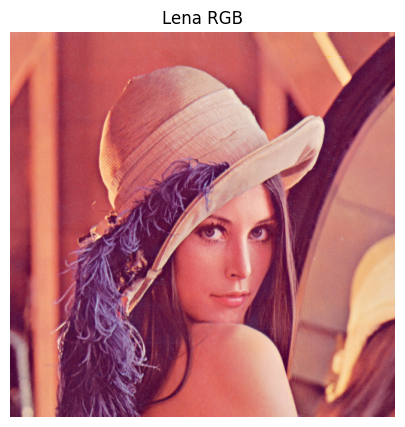

In [ ]:
# Контвертируем изображение в нужный формат
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# "BGR2RGB" -> "Blue Green Red to Red Green Blue"

plt.figure(figsize=(15, 5))
plt.title('Lena RGB')
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

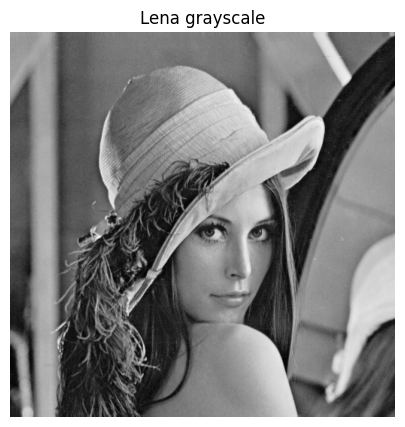

In [ ]:
# Мы также может перевести изображение в "grayscale" формат
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 5))
plt.title('Lena grayscale')
plt.imshow(img_gray, cmap='gray')
plt.axis('off');

In [ ]:
# Форматы
is_color_format = lambda var: var.startswith('COLOR_')
list(filter(is_color_format, dir(cv2)))

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_BGGR2BGR',
 'COLOR_BAYER_BGGR2BGRA',
 'COLOR_BAYER_BGGR2BGR_EA',
 'COLOR_BAYER_BGGR2BGR_VNG',
 'COLOR_BAYER_BGGR2GRAY',
 'COLOR_BAYER_BGGR2RGB',
 'COLOR_BAYER_BGGR2RGBA',
 'COLOR_BAYER_BGGR2RGB_EA',
 'COLOR_BAYER_BGGR2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GBRG2BGR',
 'COLOR_BAYER_GBRG2BGRA',
 'COLOR_BAYER_GBRG2BGR_EA',
 'COLOR_BAYER_GBRG2BGR_VNG',
 'COLOR_BAYER_GBRG2GRAY',
 'COLOR_BAYER_GBRG2RGB',
 'COLOR_BAYER_GBRG2RGBA',
 'COLOR_BAYER_GBRG2RGB_EA',
 'COLOR_BAYER_GBRG2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_

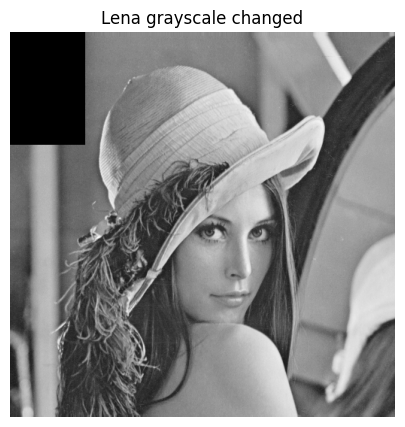

In [ ]:
# Возможно итерироваться по пикселям изображения
img_gray_copy = img_gray.copy()

for i in range(img_gray_copy.shape[0]):  # По строкам
    for j in range(img_gray_copy.shape[1]): # По столбцам
        if i < 150 and j < 100:
            img_gray_copy[i, j] = 0

plt.figure(figsize=(15, 5))
plt.title('Lena grayscale changed')
plt.imshow(img_gray_copy, cmap='gray')
plt.axis('off');

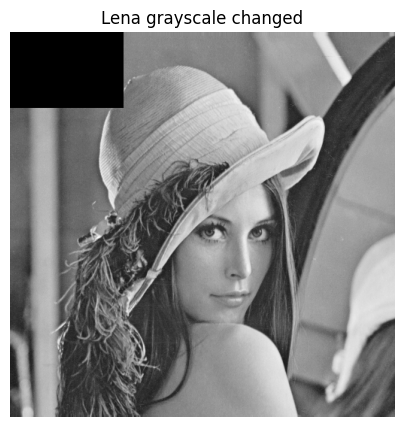

In [ ]:
# Однако, OpenCV имеет функционал чтобы сделать тоже самое что в ячейке ранее
img_gray_copy = img_gray.copy()

img_gray_copy = cv2.rectangle(img_gray_copy, (0, 0), (150, 100), color=0, thickness=-1)

plt.figure(figsize=(15, 5))
plt.title('Lena grayscale changed')
plt.imshow(img_gray_copy, cmap='gray')
plt.axis('off');

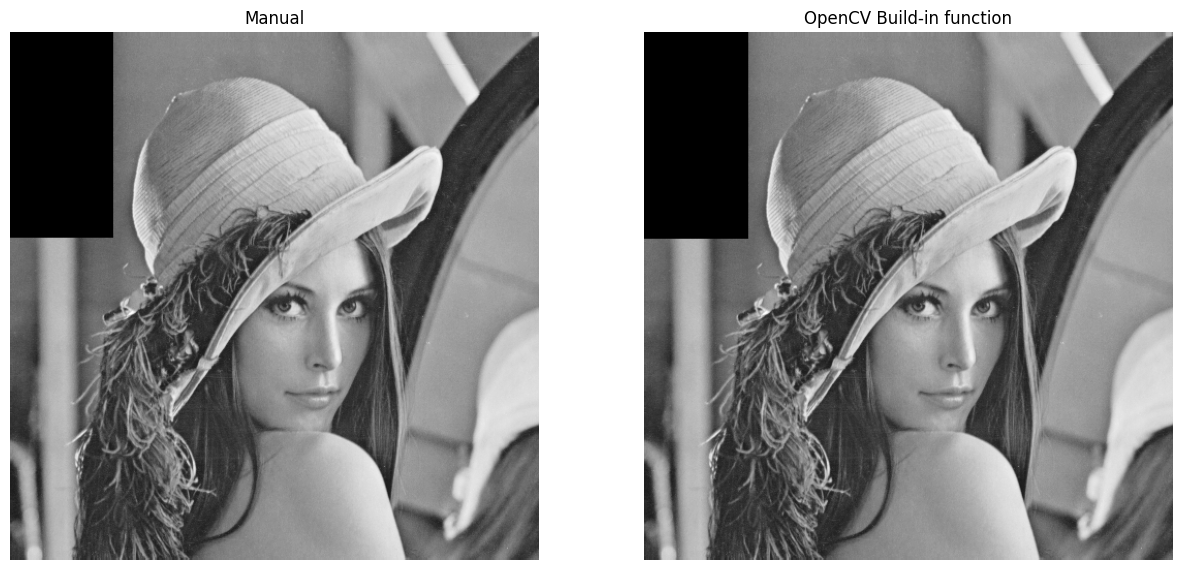

In [ ]:
# Про порядок указания координат в OpenCV
#
# OpenCV определяет порядок указания осей в своих функциях: (x, y)
# хотя при ручном итерировании оси идут в порядоке "строка-стобец" (y, x)


img_gray_copy_1 = img_gray.copy()

x_threshold = 100
y_threshold = 200

for y in range(img_gray_copy_1.shape[0]):  # строка
    for x in range(img_gray_copy_1.shape[1]):  # столбец
        if x < x_threshold and y < y_threshold:
            img_gray_copy_1[y, x] = 0


img_gray_copy_2 = img_gray.copy()
pt1 = (0, 0)
pt = (x_threshold, y_threshold)  # ВАЖНО !! Не (y, x), а (x, y) !!

# Рисование прямоугольника на изображении
img_gray_copy_2 = cv2.rectangle(img_gray_copy_2,
                                pt1=(0, 0),
                                pt2=(x_threshold, y_threshold),
                                color=0,
                                thickness=-1)
# thickness == -1 => Закрасить фигуру (в данном случае прямоугольник)


plt.figure(figsize=(15, 10))
ax = plt.subplot(121)
ax.set_title('Manual')
ax.imshow(img_gray_copy_1, cmap='gray')
ax.axis('off')

ax = plt.subplot(122)
ax.set_title('OpenCV Build-in function')
ax.imshow(img_gray_copy_2, cmap='gray')
ax.axis('off');

### Алгоритмы

Так же в OpenCV есть реализации базовых алгоритмов компьютерного зрения

   - Edge Detection (Canny Filter)
   - Line Detection (Hough Lines)
   - Circles Detection (Hough Circles)

#### Отступление про классические алгоритмы

Они опираются на матричные операторы. С их помощью сворачивают исходную картинку

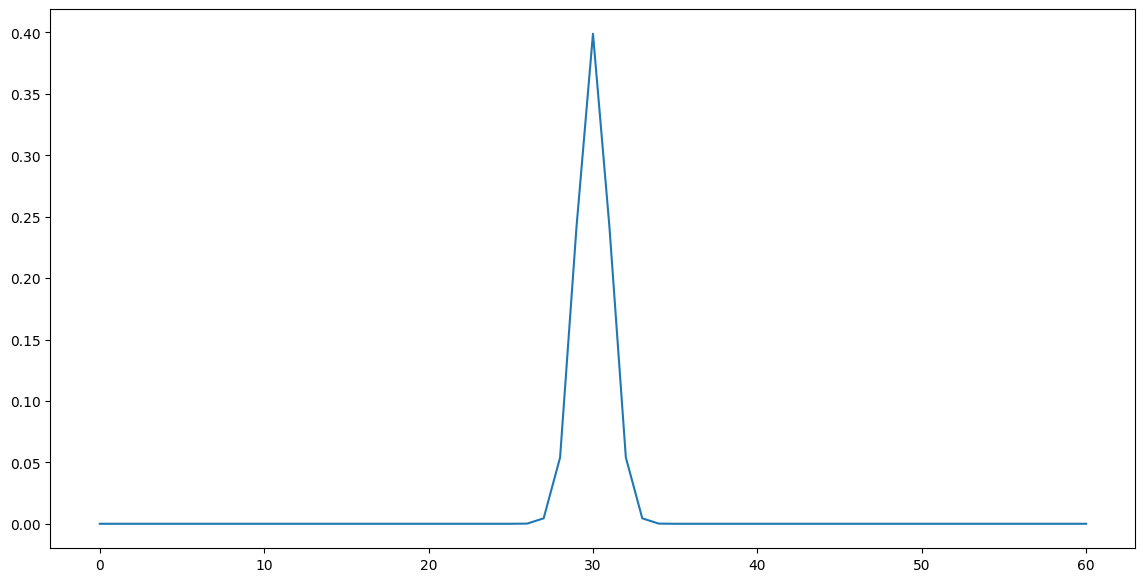

In [ ]:
# Например фильтр гаусса

from math import pi, sqrt, exp

def gauss(n: int, sigma: int = 1):
    gauss_f = lambda x : 1 / (sigma * sqrt(2*pi)) * exp(-float(x)**2/(2*sigma**2))

    return [gauss_f(x) for x in range(-n//2, n//2 + 1)]

plt.plot(gauss(n=60, sigma=1))

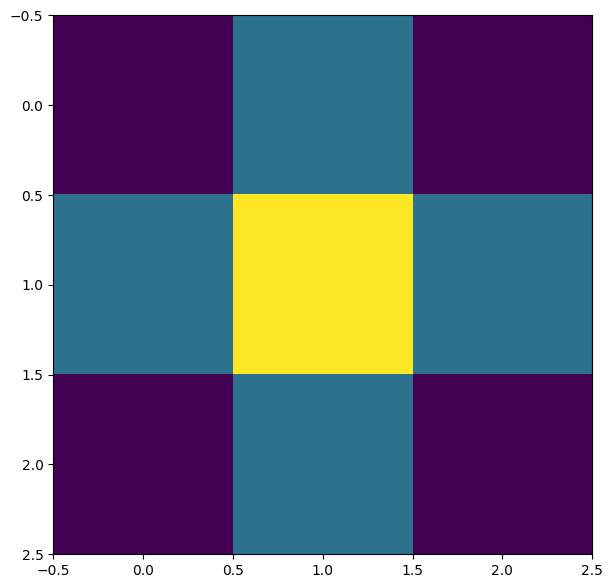

In [ ]:
# 2d фильтр

def gaus2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    # mx, my - mean for x y
    # sx, sy - size for x y
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

x = np.linspace(-1, 1, num=3)
y = np.linspace(-1, 1, num=3)
x, y = np.meshgrid(x, y) # get 2D variables instead of 1D
gaus_filter = gaus2d(x, y)

plt.imshow(gaus_filter)
plt.show()

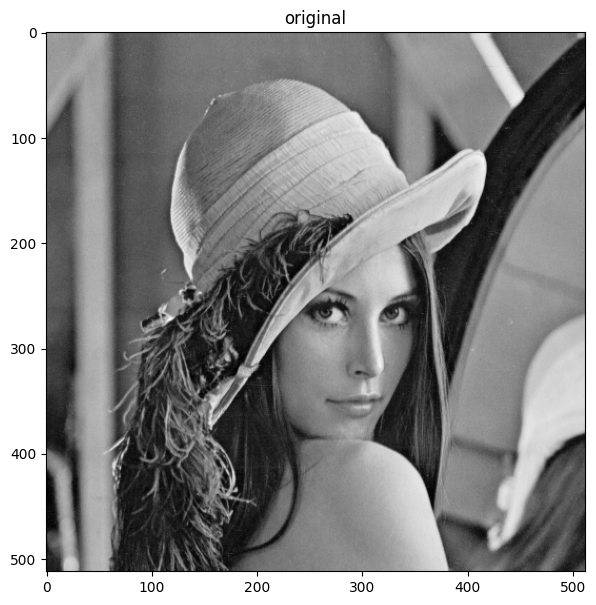

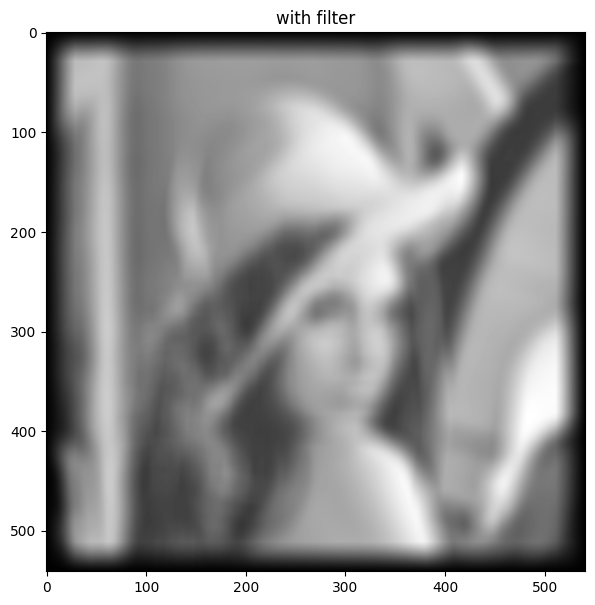

In [ ]:
# Применим к Лене
from scipy.signal import convolve2d


img = cv2.cvtColor(cv2.imread('pics/lena.png'), cv2.COLOR_BGR2GRAY)
convolved = convolve2d(img, gaus_filter)

# original
plt.figure(figsize=(7, 7))
plt.title('original')
plt.imshow(img, cmap='gray')
plt.show()

# with filter
plt.figure(figsize=(7, 7))
plt.imshow(convolved, cmap='gray')
plt.title('with filter')
plt.show()

#### Edge detection (Canny)

Подробнее в [доке](https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html)

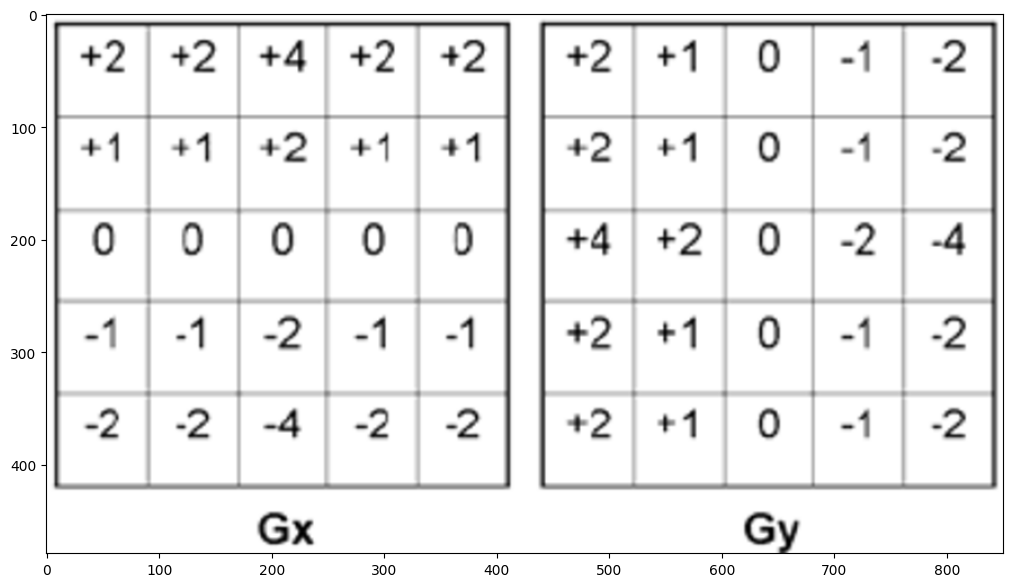

In [ ]:
# Использует фильтр Собеля
plt.imshow(cv2.imread('pics/sobel.png'))

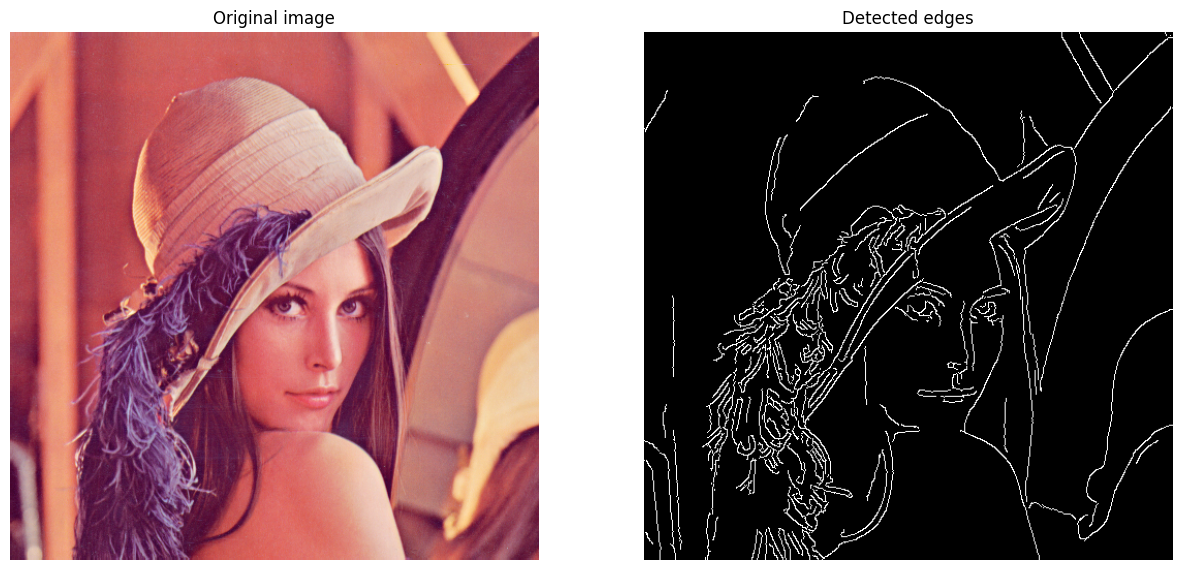

In [ ]:
# Суть в поиске границ. Для этого:
# 1. убирается шум
# 2. берётся градиент по интенсивности изображения
img_gray_copy = cv2.blur(img_gray, ksize=(5, 5))

edges = cv2.Canny(
    image=img_gray_copy,
    threshold1=50,
    threshold2=100
)

plt.figure(figsize=(15, 10))

ax = plt.subplot(121)
ax.set_title('Original image')
ax.axis('off')
ax.imshow(img_rgb)

ax = plt.subplot(122)
ax.set_title('Detected edges')
ax.axis('off')
ax.imshow(edges, cmap='gray');

Зачем нужны алгоритмы классического CV?

Они решают задачи:
- Предобработки изображения
- Мало тренировочных данных (Недостаточно для нейросетей)
- Нужно робастное решение

## Нейросетевое компьютерное зрение

## слои

### свертка

In [ ]:
from IPython.display import Image

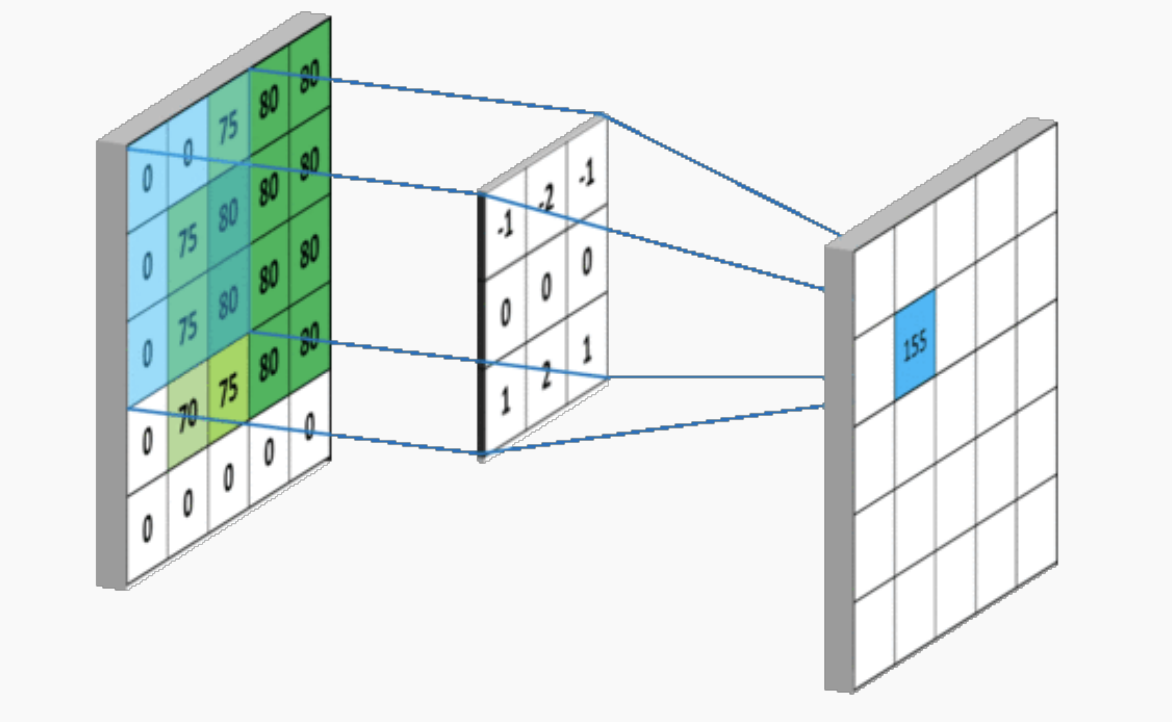

In [ ]:
Image(filename='./pics/2.png')

### пулинг

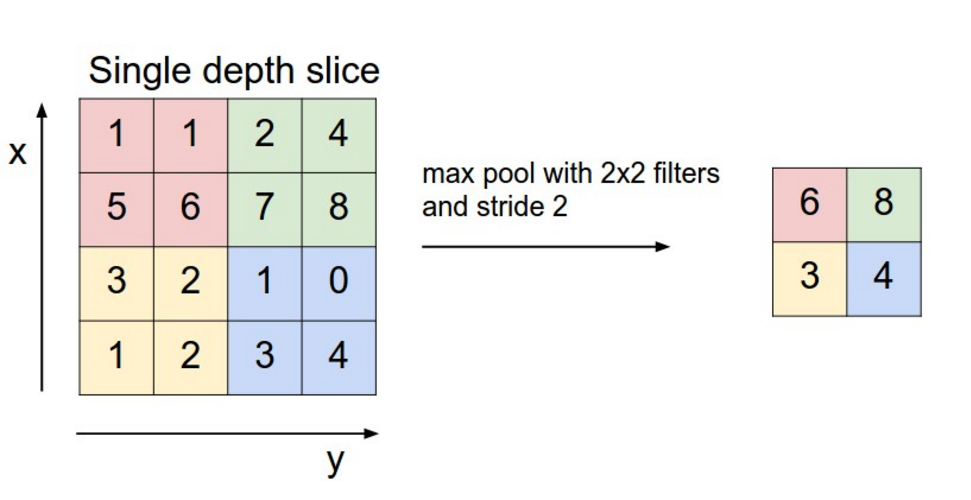

In [ ]:
Image(filename='./pics/4.png')

## сверточные сети

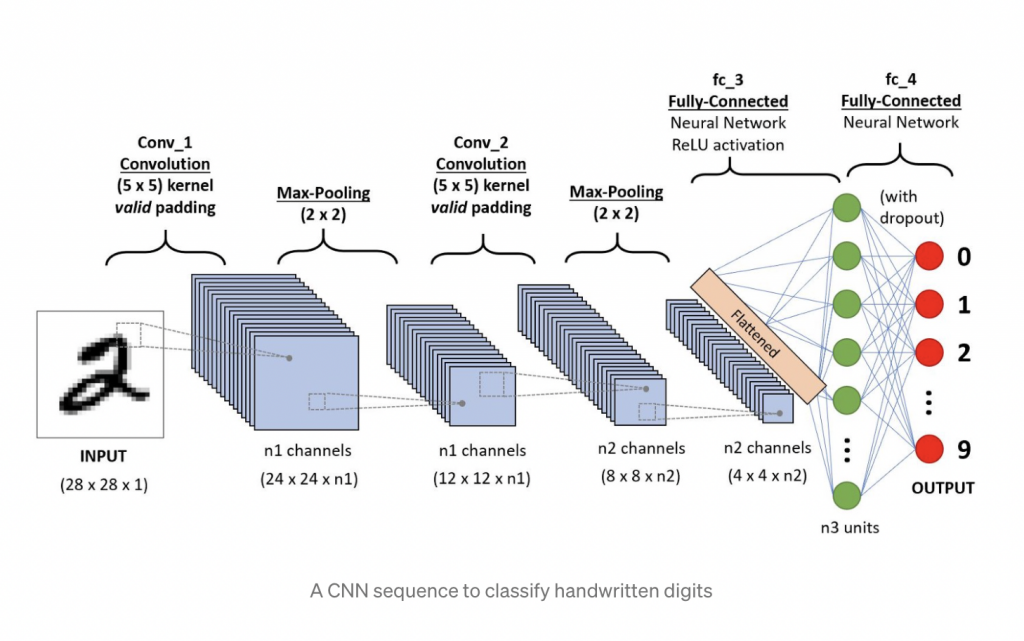

In [ ]:
Image(filename='./pics/1.png')

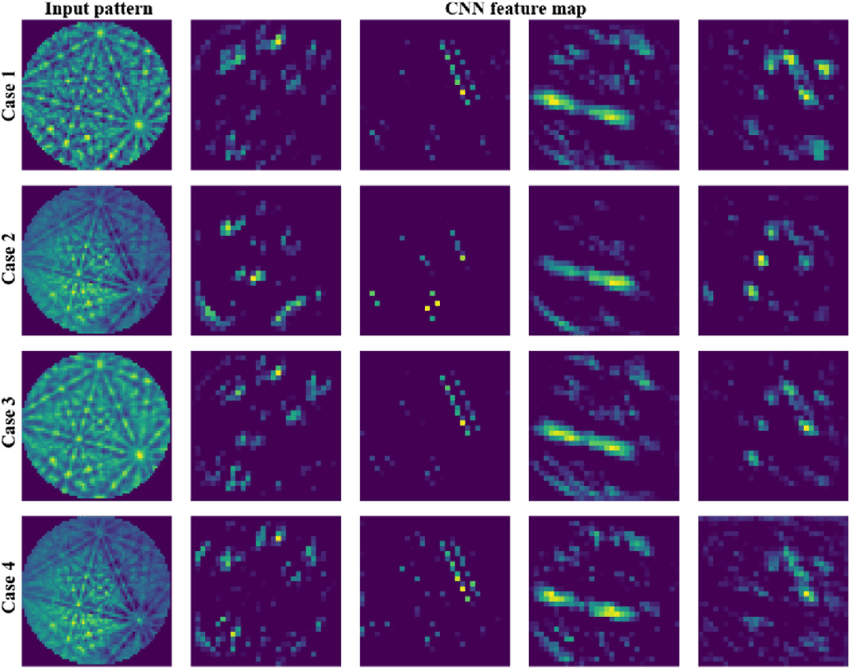

In [ ]:
# feature maps
# https://www.kaggle.com/code/reighns/visualizing-convolution-filters
Image(filename='./pics/5.png')

## архитектуры классификации

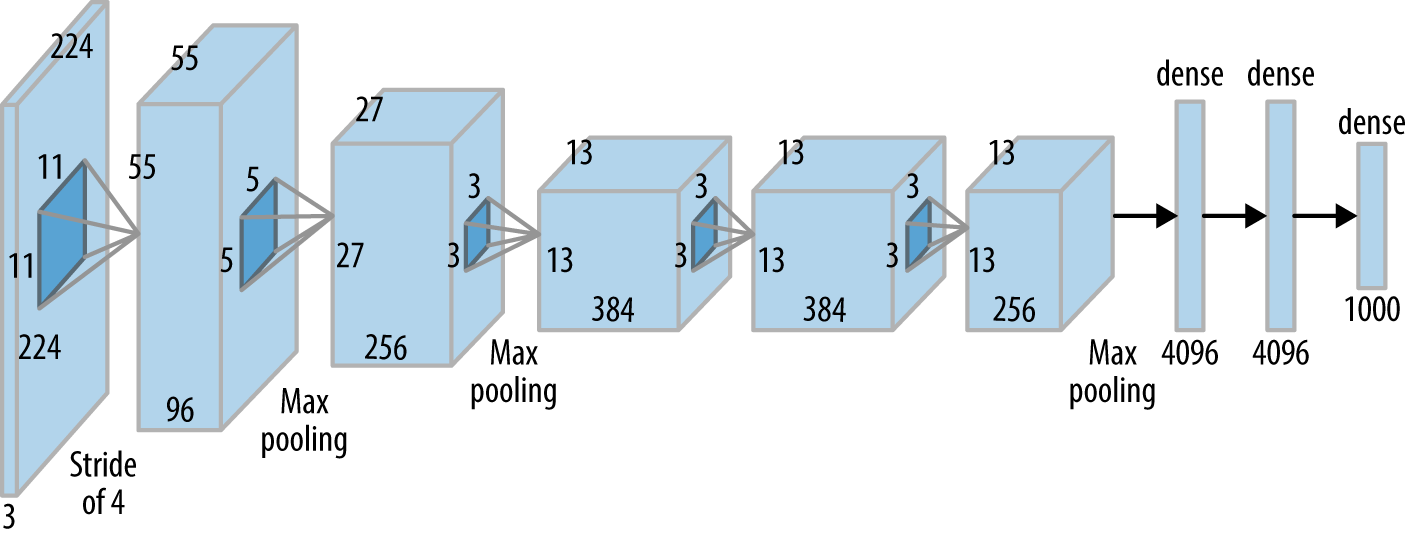

In [ ]:
# alexnet (2012)
Image(filename='./pics/6.png')

датасеты
- imagenet - классификация https://devopedia.org/imagenet
- coco (common objects in context) - сегментация https://cocodataset.org/#home

а также
- PASCAL VOC (Visual Object Classes): Этот набор данных также используется для задач классификации, детекции и сегментации
- Open Images Dataset
- Cityscapes Dataset: Набор данных, ориентированный на задачи сегментации изображений в городской среде, содержит изображения уличных сцен, с разметкой дорог, зданий, пешеходов и других объектов.
- ADE20K Dataset: Этот набор данных содержит изображения, размеченные по типам объектов и сцен внутри помещений (интерьеров) и вне помещений (экстерьеров).

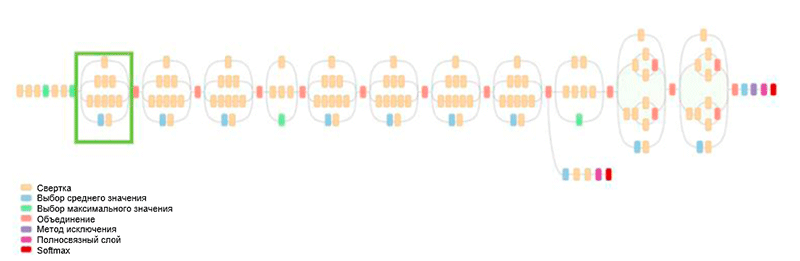

In [ ]:
# дальше про модели
## inception (2014)
# https://habr.com/ru/companies/intel/articles/417809/
Image(filename='./pics/7.png')

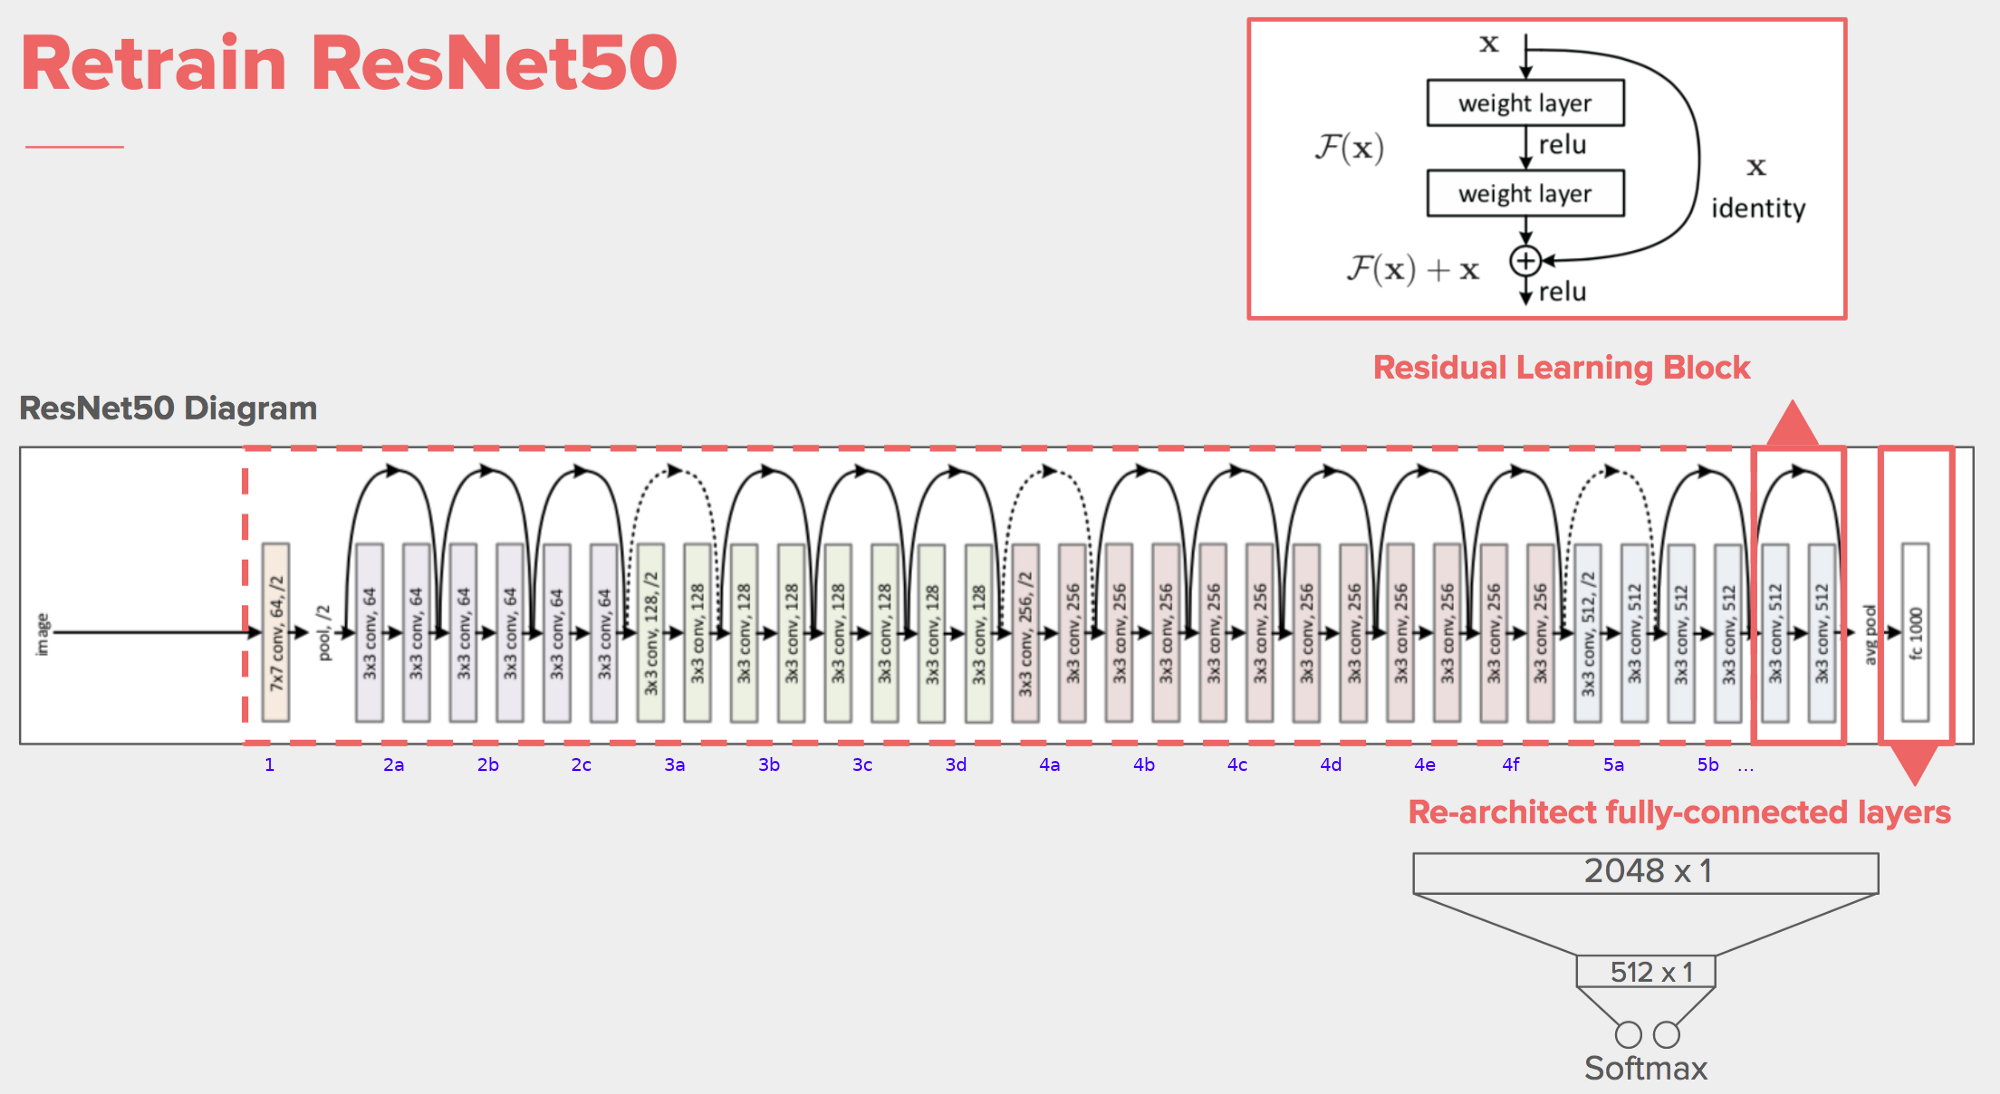

In [ ]:
# resNet (2015)
Image(filename='./pics/8.png')

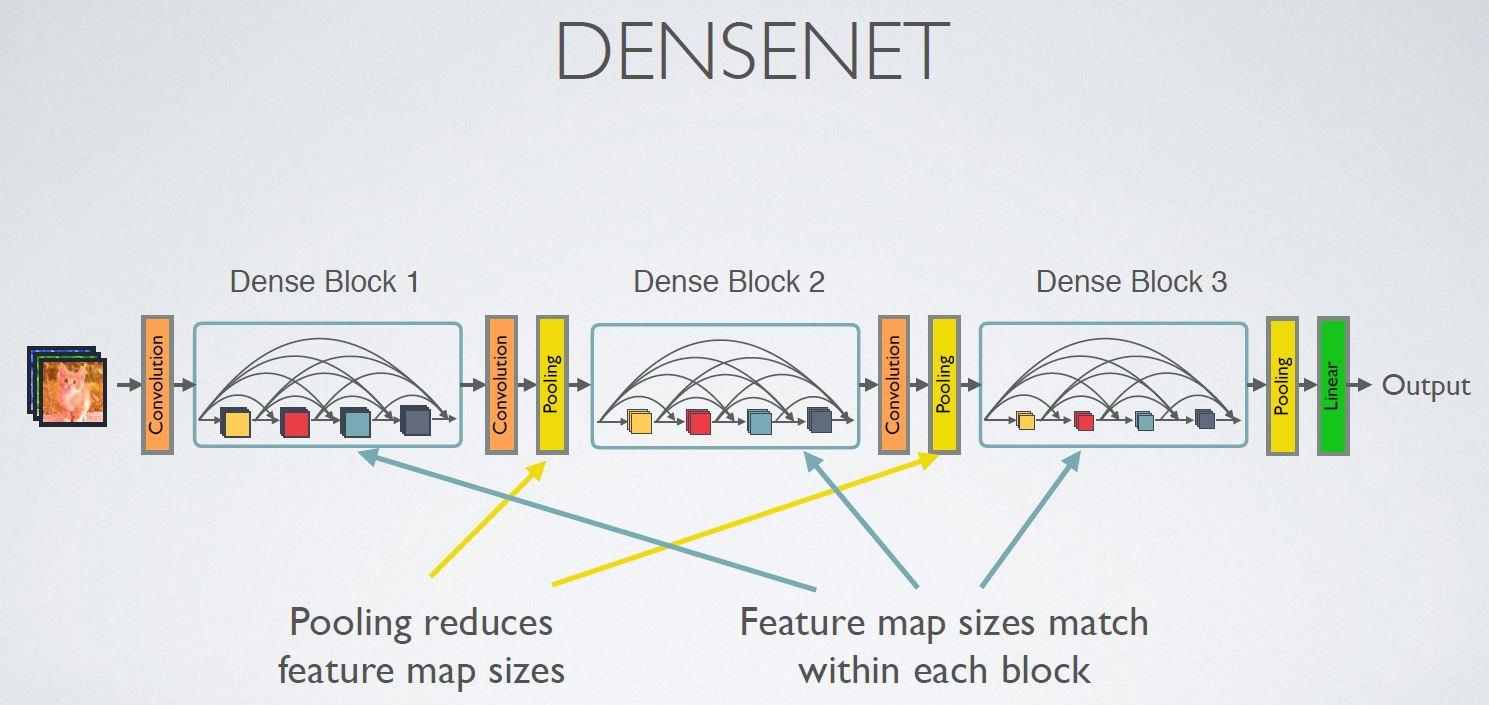

In [ ]:
# denseNet (2017)
Image(filename='./pics/9.jpeg')

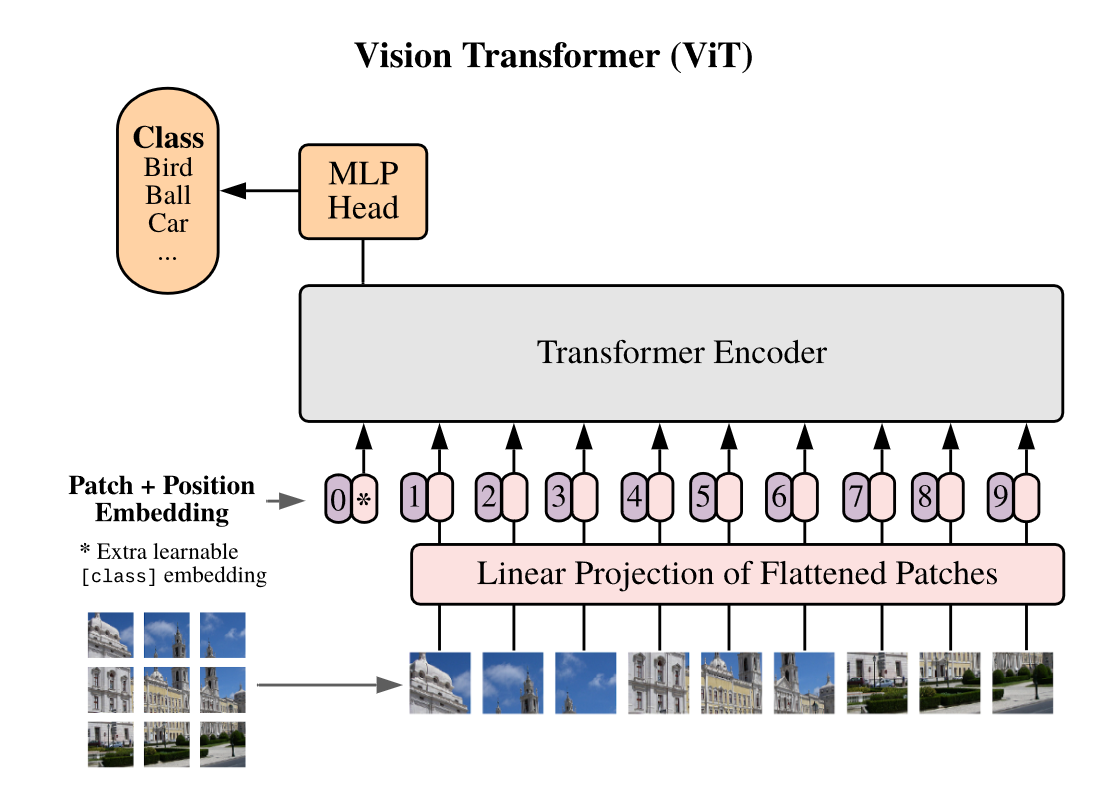

In [ ]:
# vision transformer (2020)
Image(filename='./pics/10.png')

## архитектуры сгементации

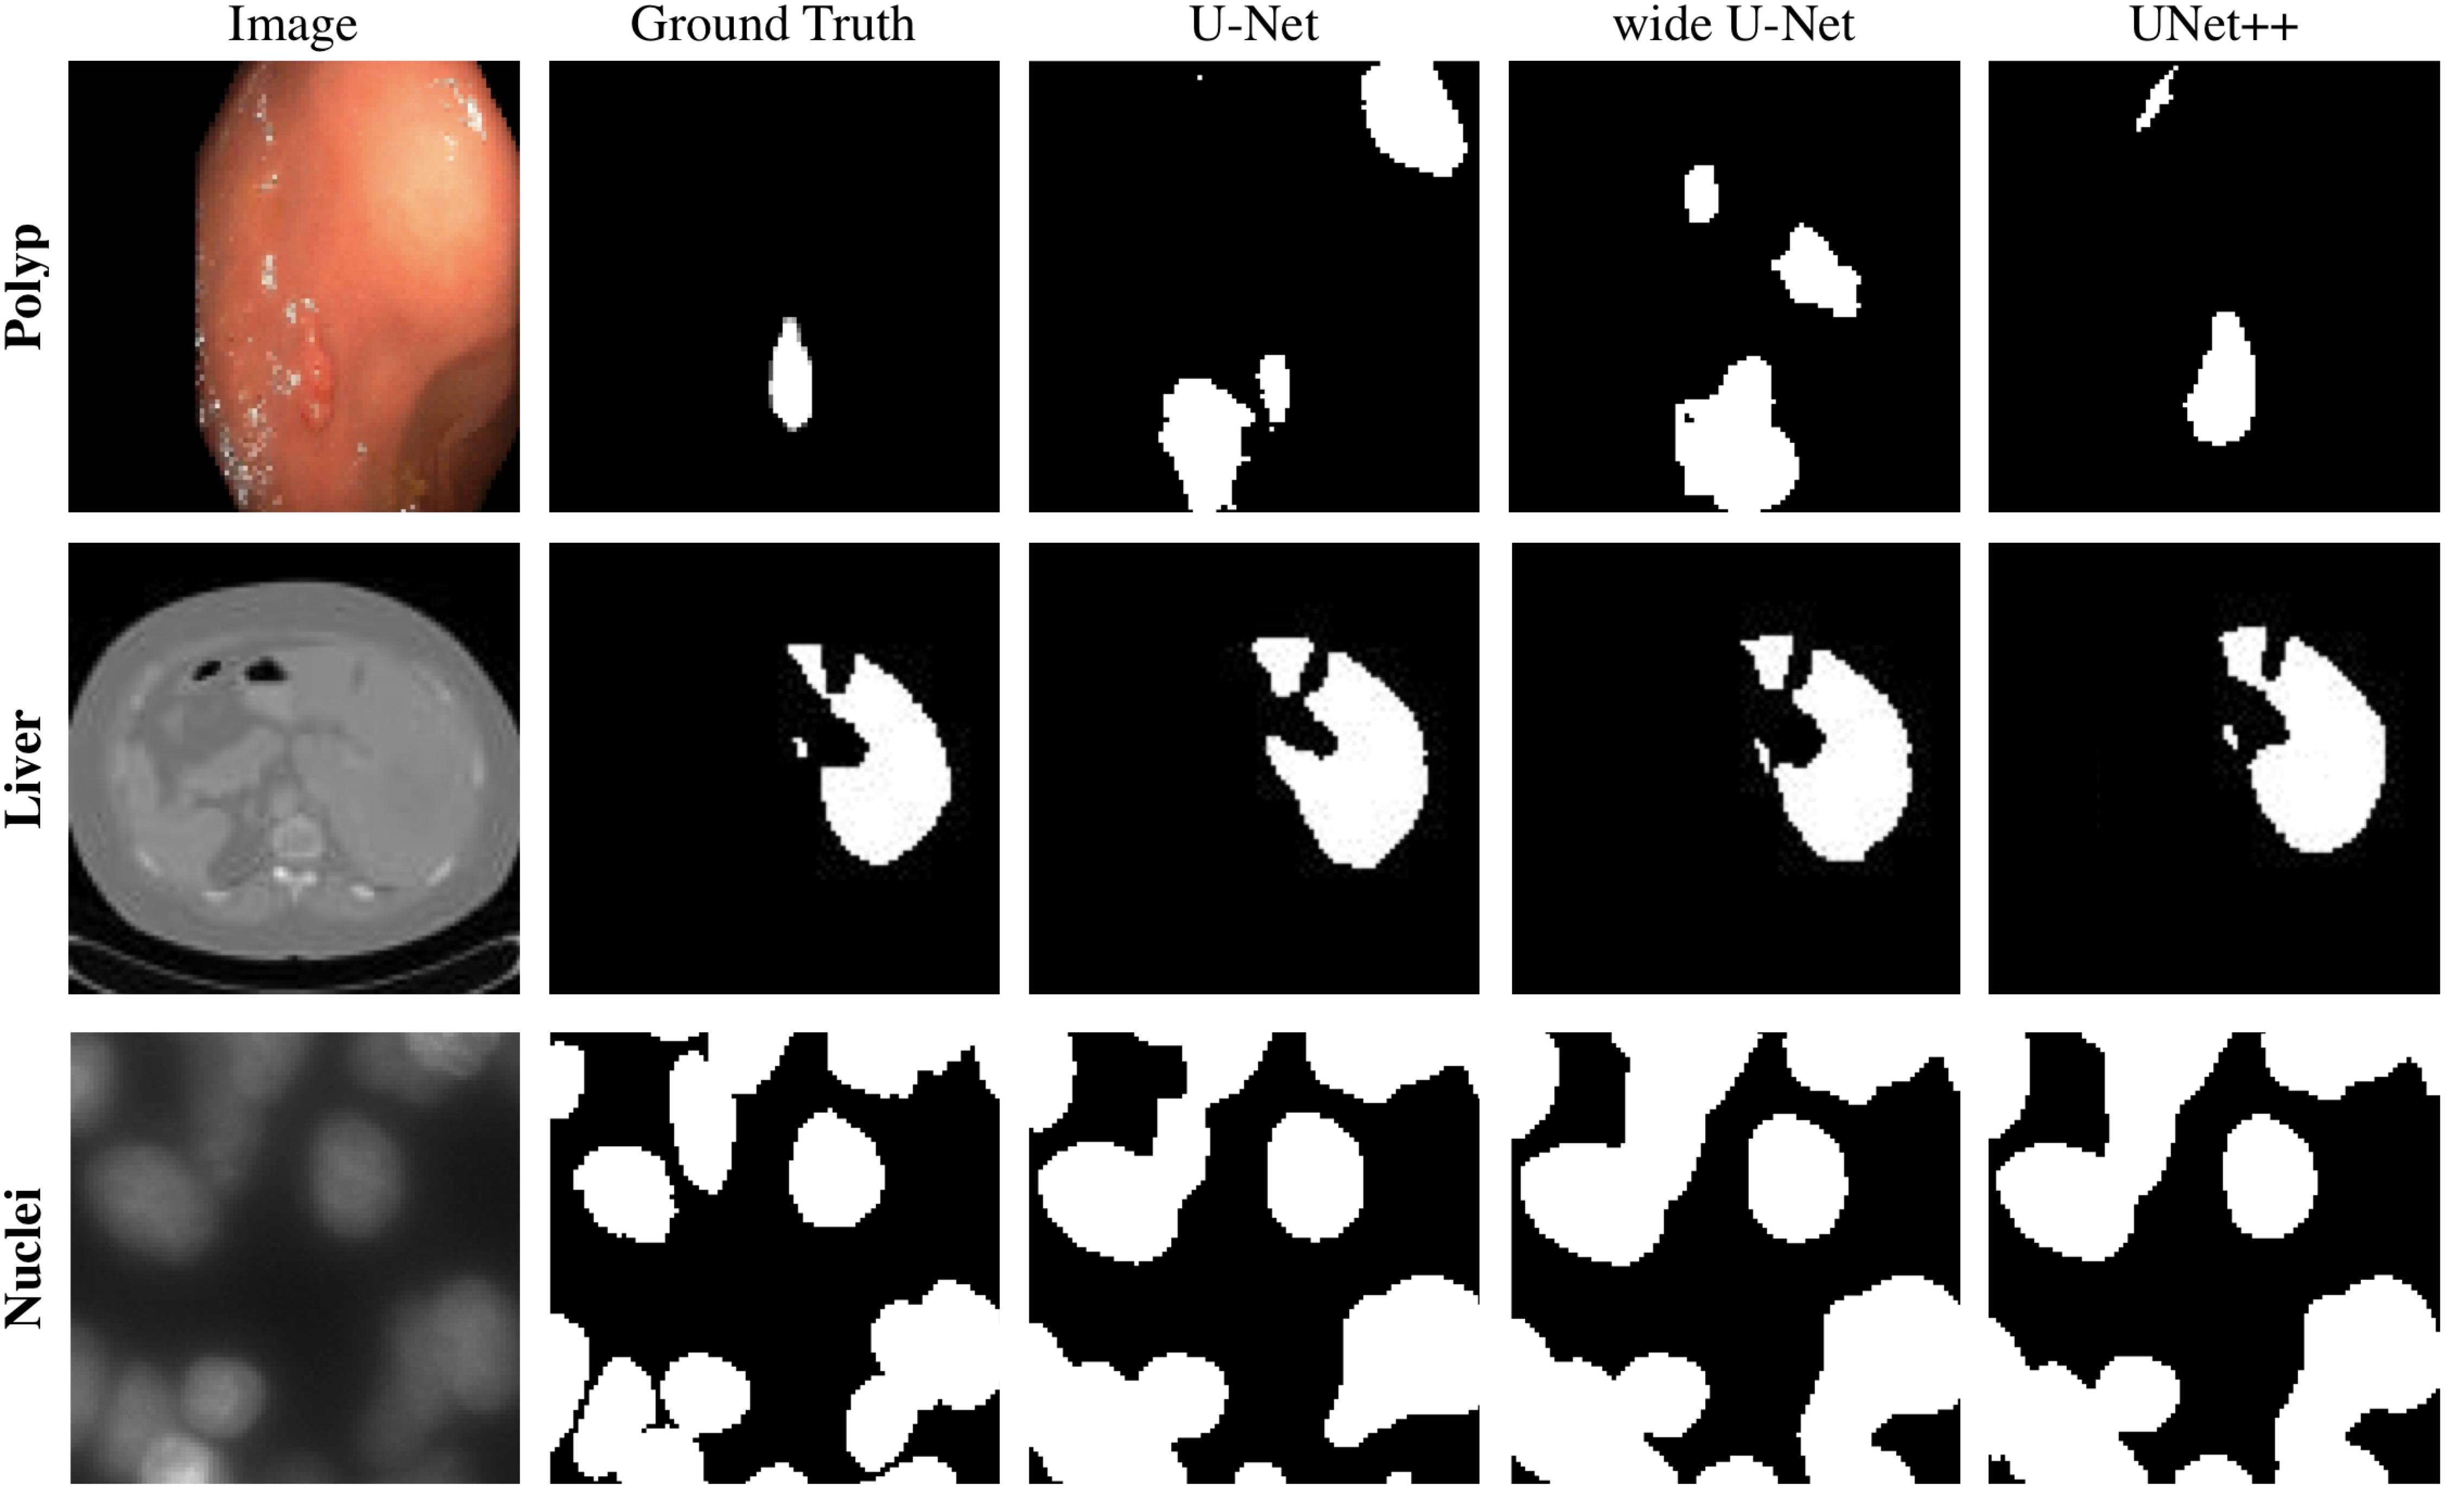

In [ ]:
# пример сегментации
Image(filename='./pics/12.png')

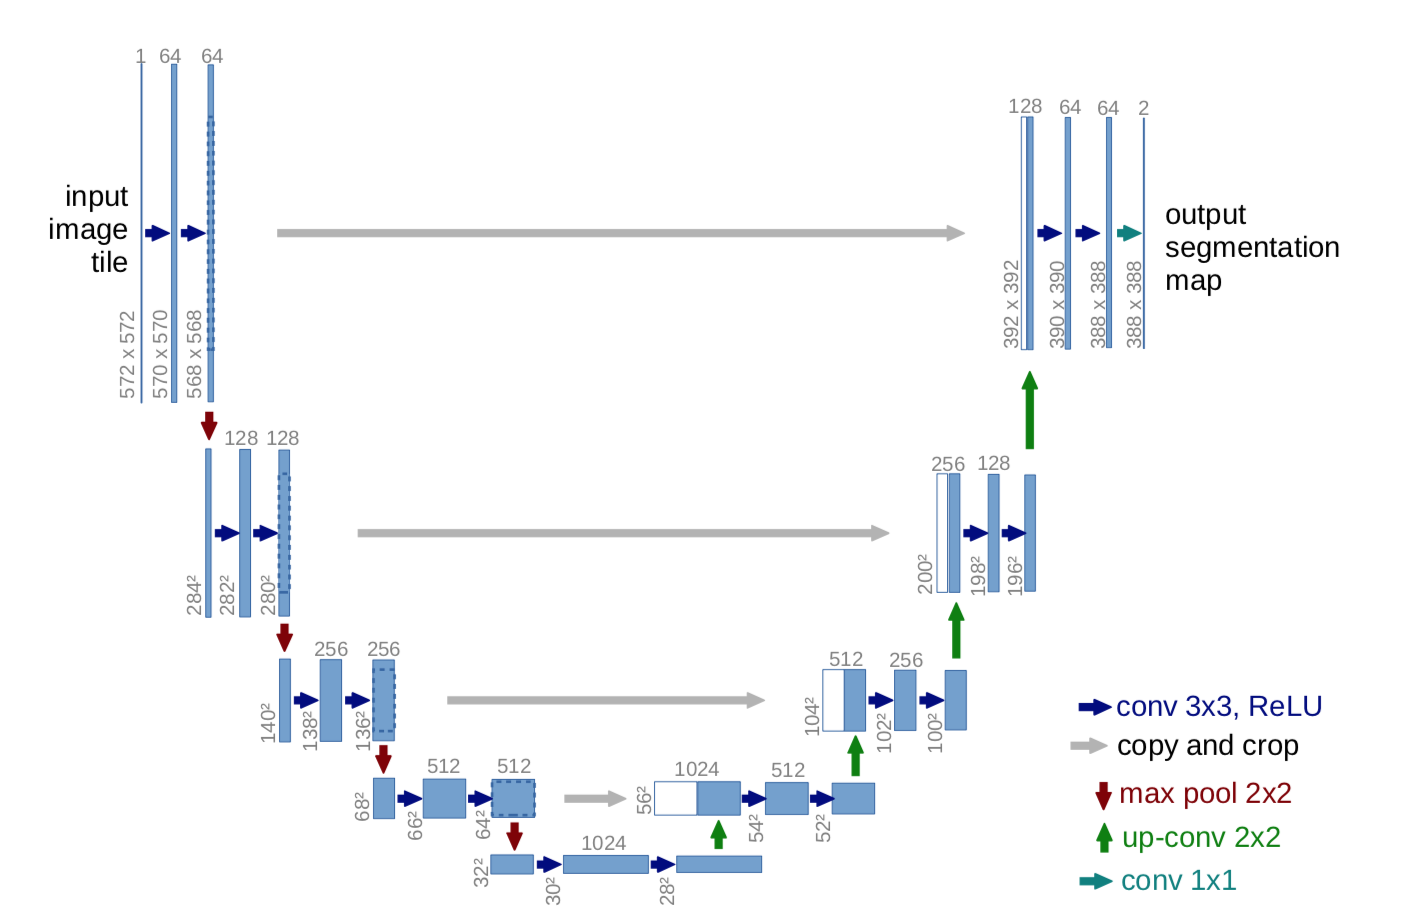

In [ ]:
# unet (2015)
Image(filename='./pics/11.png')

In [ ]:
# segment anything
# https://segment-anything.com/demo#

## генерация

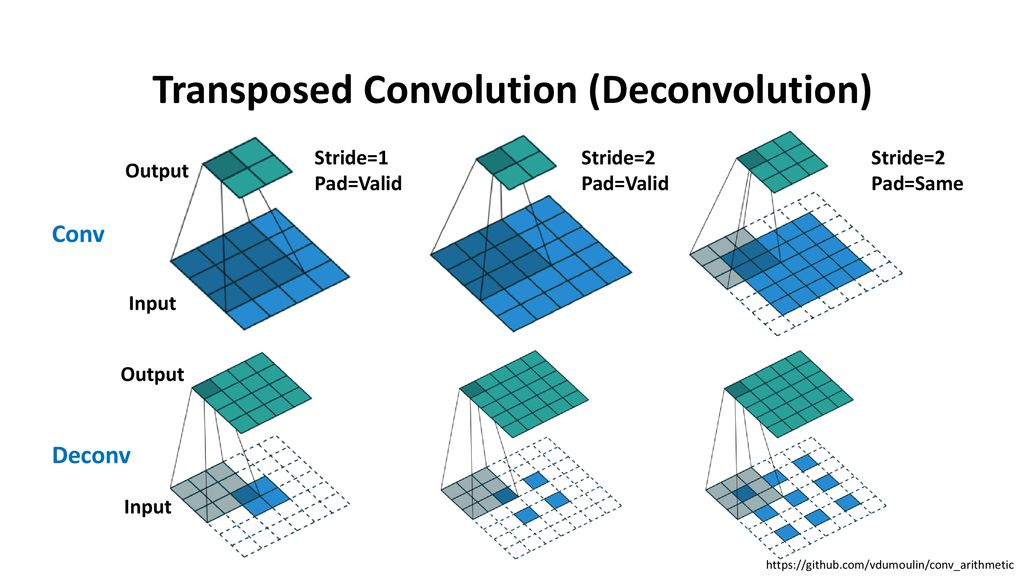

In [ ]:
# deconvolution
Image(filename='./pics/14.jpeg')

In [ ]:
# Generative adversarial network
Image(filename='./pics/14.jpeg')

### Использование пред-обученных моделей в задаче классификации чисел

(CIFAR + Transfer learning)

**Идея**: В библиотеках машинного обучения довольно существуют целые "зоопарки" (*model zoo*) из пред-обученных моделей. Эти модели можно до-обучить (*fine-tune*) для решения другой задачи.


Описаный подход называется **"Transfer learning"**, так как знания обученной нейронной сети транслируются на другую задачу из схожей области.

[Ссылка](https://pytorch.org/serve/model_zoo.html) на подобный "зоопарк"

In [ ]:
import random
import numpy as np

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision.models import resnet50

from tqdm.notebook import tqdm, trange

# Фиксируем random seed для воспроизводимости результатов
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True


OUTPUT_DIM = 10  # Количество классов
EPOCH_NUM = 4  # Сколько эпох будет обучать модель

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
basic_transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()
])  # Базовые аугментации для тренировочных данных (грубо говоря бесплатное увеличение тренировочной выборки)

In [ ]:
# Загрузим данные

train_dataset = CIFAR10(
    root='./CIFAR/train',
    train=True,
    transform=basic_transform,
    download=True
)

test_dataset = CIFAR10(
    root='./CIFAR/test',
    train=False,
    transform=transforms.ToTensor(),  # Для тестовых данные НЕ НАДО использовать нгикакие аугментации
    download=True
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Создадим DataLoader'ы (для того чтобы было проще итерироваться)

dataloaders = {
    'train': DataLoader(
        dataset=train_dataset,
        batch_size=128,
        shuffle=True
    ),
    'val': DataLoader(
        dataset=test_dataset,
        batch_size=128,
        shuffle=False
    )
}

In [ ]:
# Создадим класс нашей модели

# Так как мы хотим использовать все фишки библиотеки Pytorch важно наследоваться от nn.Module
class CifarClassifier(nn.Module):
    def __init__(self, ouput_dim):
        super(CifarClassifier, self).__init__()  # "Регистрируем" создаваемый объект как нейросетевую модель
        self.model = resnet50(pretrained=True)  # Скачиваем пред-обученную основу для нашей модели

        # "Замораживаем" все веса для ускорения обучения (мы считаем что они уже хорошо обучены)
        for param in self.model.parameters():
            param.requires_grad = False

        # Создаем "голову" которую мы и будем обучать
        self.fc1 = nn.Sequential(
            nn.Linear(1000, 64),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Dropout(0.25),
            nn.Linear(64, ouput_dim)
        )

    def embed(self, x):
        return self.fc1(self.model(x))

    # Описываем как именно наша модель будет генерировать предсказания
    def forward(self, x):
        resnet_out = self.embed(x)
        return self.fc2(resnet_out)

In [ ]:
model = CifarClassifier(OUTPUT_DIM)
model = model.to(DEVICE)  # Переносим модель на GPU

/Users/i.shamov/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/i.shamov/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Создаем функцию ошибки (так как задача многоклассовой классификации, то используем кросс-энтропию)
# Более подробно об этом будет в курсе машинного обучения
loss_function = torch.nn.CrossEntropyLoss()

# Регистрируем для нашей модели способ изменения её весов
optimizer = torch.optim.Adam(model.parameters(), amsgrad=True, lr=1e-4)

In [ ]:
loss_hist = {'train': [], 'val': []}
acc_hist = {'train': [], 'val': []}

# Важно! В данном примере точность используется для упрощения.
# Никогда не используйте её если у вас несбалансированная выборка
# Возьмите лучше F_score или ROC_AUC (об этом вам потом расскажут)

# Основной алгоритм обучения
for epoch in trange(EPOCH_NUM, desc='Whole pipeline'):

    for phase in ['train', 'val']:
        dataloader = dataloaders[phase]

        # Это условие необходимо так как у нас есть слой DropOut
        # И на валидации его принято фиксировать
        if phase == 'train':
            model.train()
        elif phase == 'val':
            model.eval()

        running_loss = 0.
        running_acc = 0.

        # Проходимся по набору данных
        for (X_batch, y_batch) in tqdm(dataloader, desc=f'Epoch: {epoch + 1}. Phase: {phase}'):
            # Нормализуем данные
            X_batch = X_batch / 255
            X_batch = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))(X_batch)

            # Переносим на устройство
            X_batch = X_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)

            # Для корректного обучения перед каждым шагом необходимо сбрасывать прошлые ошибки
            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                y_pred = model(X_batch)

                loss_value = loss_function(y_pred, y_batch)
                y_pred_class = y_pred.argmax(dim=1)

                # На обучении мы хотим учиться в зависимости от ошибки
                if phase == 'train':
                    loss_value.backward()
                    optimizer.step()

            # Аггрегируем ошибку и точность
            running_loss += loss_value.item()
            running_acc += (y_pred_class == y_batch.data).float().mean().data.cpu().numpy()
            loss_hist[phase].append(loss_value.item())
            acc_hist[phase].append((y_pred_class == y_batch.data).float().mean().data.cpu().numpy())

        epoch_loss = running_loss / len(dataloader)
        epoch_acc = running_acc / len(dataloader)

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f} ', end='')


        acc_hist[phase].append(epoch_acc)

Whole pipeline:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 1. Phase: train:   0%|          | 0/391 [00:00<?, ?it/s]

KeyboardInterrupt: 

### Нарисуем график ошибок во время тренировки

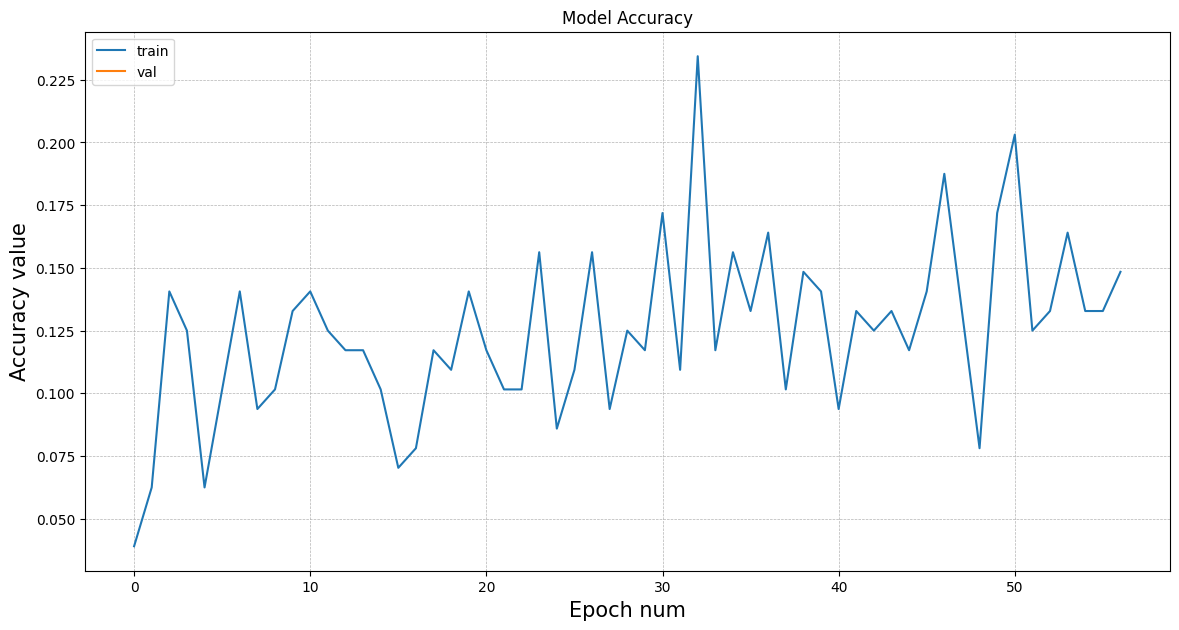

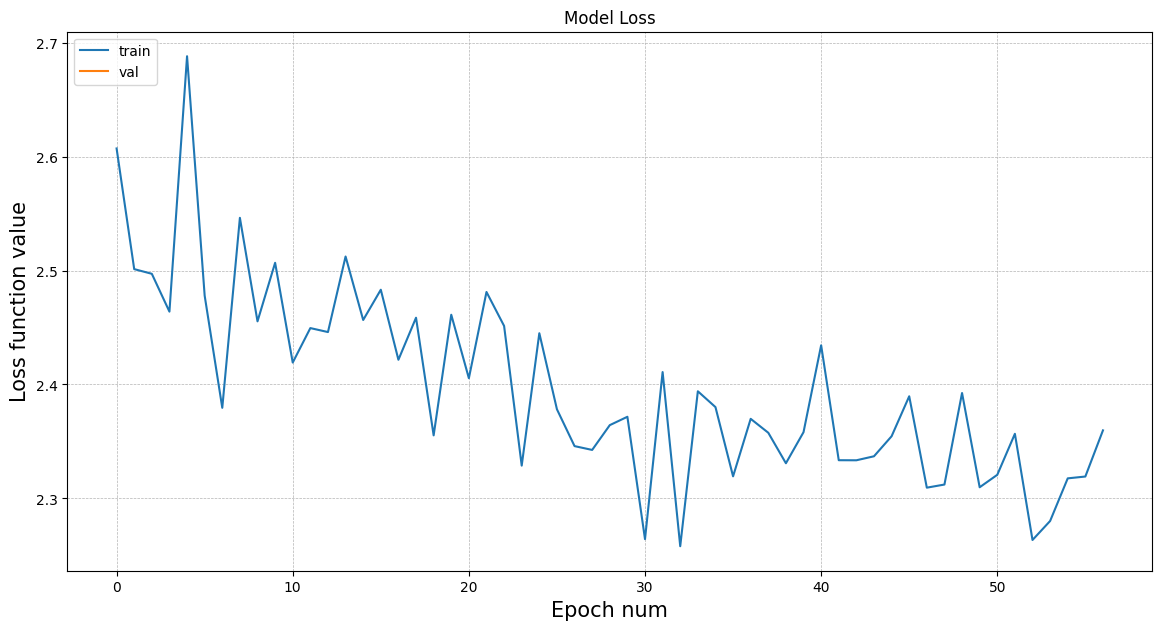

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14, 7)
for experiment_id in acc_hist.keys():
    plt.plot(acc_hist[experiment_id], label=experiment_id)
plt.legend(loc='upper left')
plt.title('Model Accuracy')
plt.xlabel('Epoch num', fontsize=15)
plt.ylabel('Accuracy value', fontsize=15)
plt.grid(linestyle='--', linewidth=0.5, color='.7')
plt.show()

plt.rcParams['figure.figsize'] = (14, 7)
for experiment_id in loss_hist.keys():
    plt.plot(loss_hist[experiment_id], label=experiment_id)
plt.legend(loc='upper left')
plt.title('Model Loss')
plt.xlabel('Epoch num', fontsize=15)
plt.ylabel('Loss function value', fontsize=15)
plt.grid(linestyle='--', linewidth=0.5, color='.7')
plt.show()

### эмбеддинги картинок

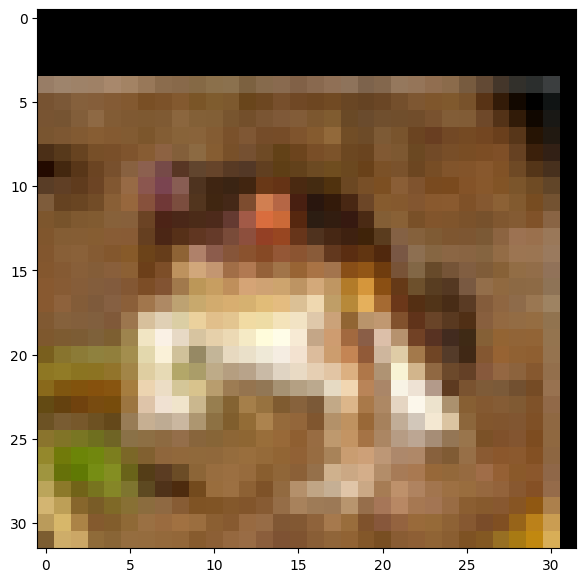

In [ ]:
img = train_dataset[0][0].detach().numpy()

plt.imshow(np.transpose(img, (1,2,0)))

In [ ]:
bs = ['a', 'b', 'c']
cs = [1, 2, 3]

def f(a,b,c) -> int:
    return a + b + c

a = [1,2,3]
f(*a)

6

In [ ]:
train_items = [train_dataset[i] for i in range(1000)]
xs, ys = zip(*train_items)

xs = torch.stack(xs)
xs = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))(xs)
xs.size()

torch.Size([1000, 3, 32, 32])

In [ ]:
embs = model.embed(xs)
embs.size()

torch.Size([1000, 64])

In [ ]:
import umap

In [ ]:
points = umap.UMAP().fit_transform(embs.detach().numpy())
points.shape

(1000, 2)

In [ ]:
xs.size()

torch.Size([1000, 3, 32, 32])

In [ ]:
from tensorboardX import SummaryWriter

writer = SummaryWriter()

In [ ]:
# log embeddings
features = xs.mean(dim=1).view(-1, 32 * 32)
writer.add_embedding(features,
                     metadata=ys,
                     label_img=xs)
writer.close()